# Importing Required Modules

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pickle

# Loading the Data

In [44]:
data = pd.read_csv("data\Thecleverprogrammer.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


# Undertanding the Data

In [45]:
data.shape

(391, 2)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [47]:
data.describe()

,Views
count,391.000000
mean,8482.606138
std,1279.661279
min,4478.000000
25%,7603.000000
50%,8363.000000
75%,9304.000000
max,12156.000000


### date atrribute is in object datatype it would be benificial if we convert it to datetime format

In [48]:
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


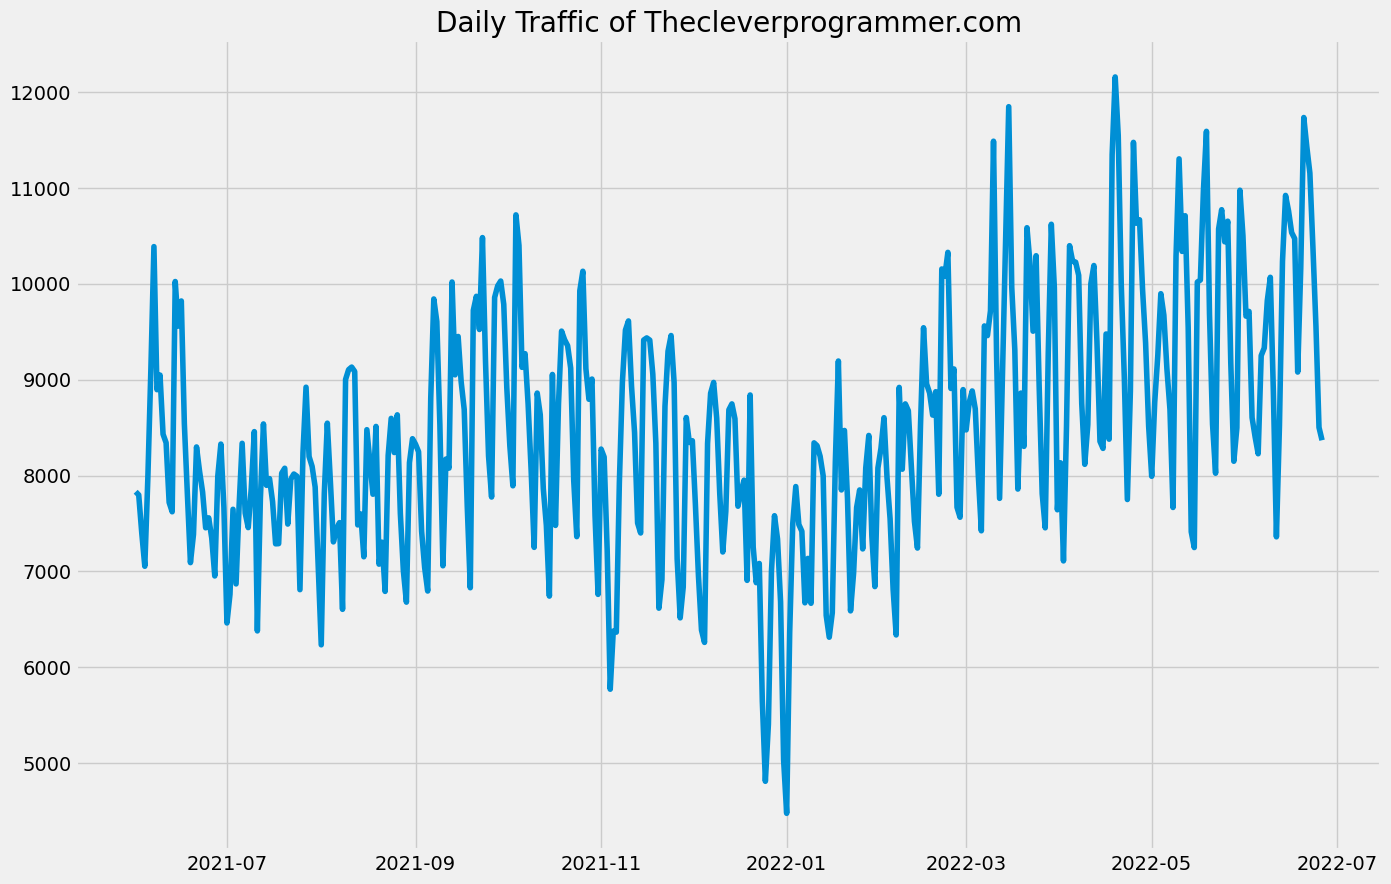

In [49]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

### website traffic data is seasonal because the traffic on the website increases during the weekdays and decreases during the weekends.

<Figure size 640x480 with 0 Axes>

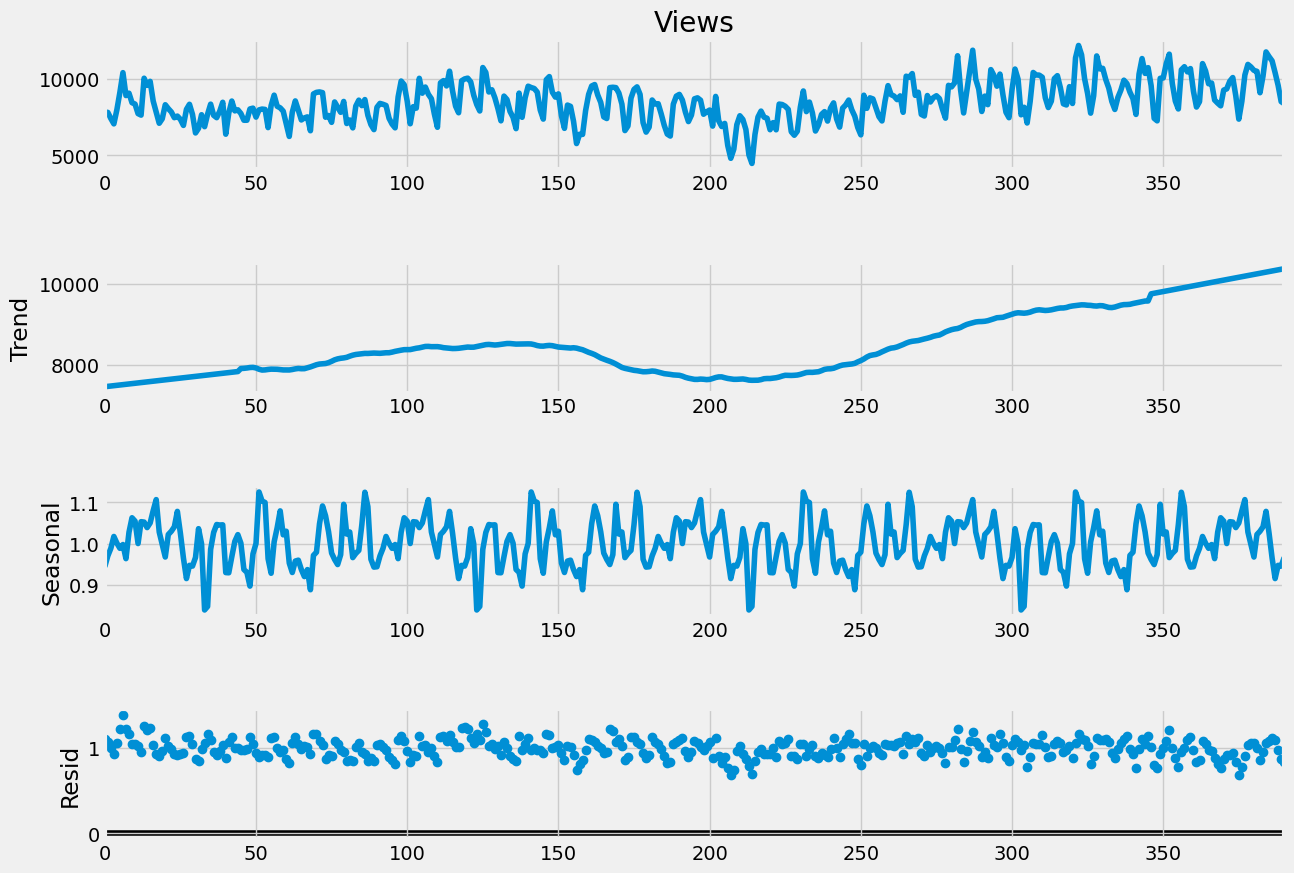

In [50]:
result = seasonal_decompose(pd.Series(data['Views']), 
                            model='multiplicative', extrapolate_trend='freq', period=90)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)
plt.show()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

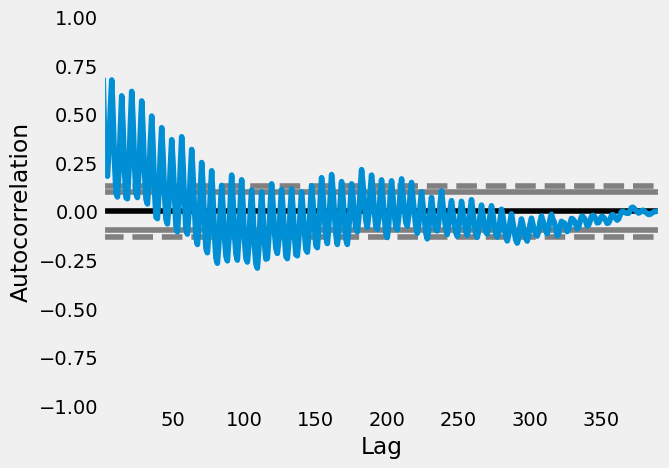

In [51]:
pd.plotting.autocorrelation_plot(data["Views"])

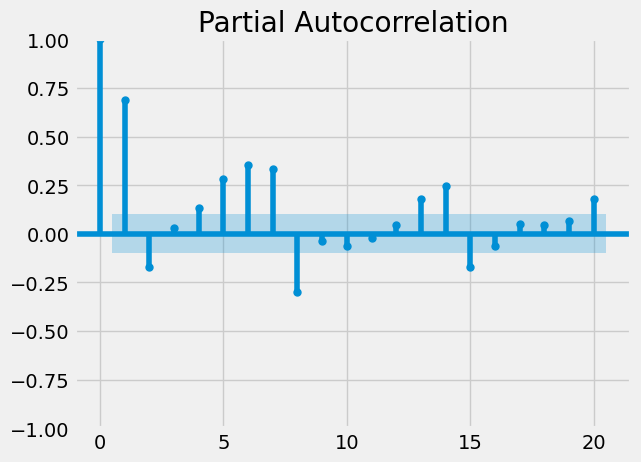

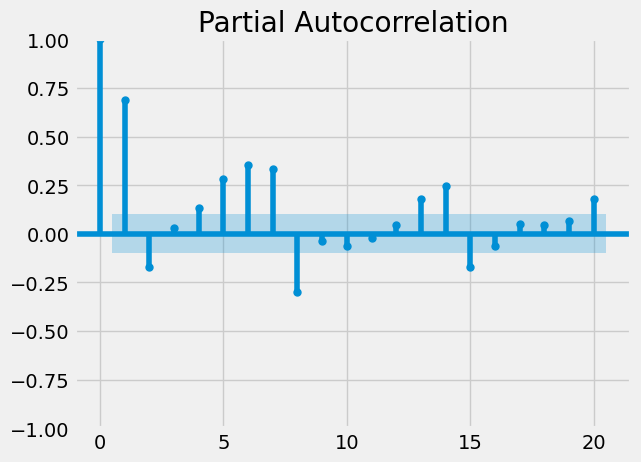

In [58]:
plot_pacf(data["Views"], lags = 20)

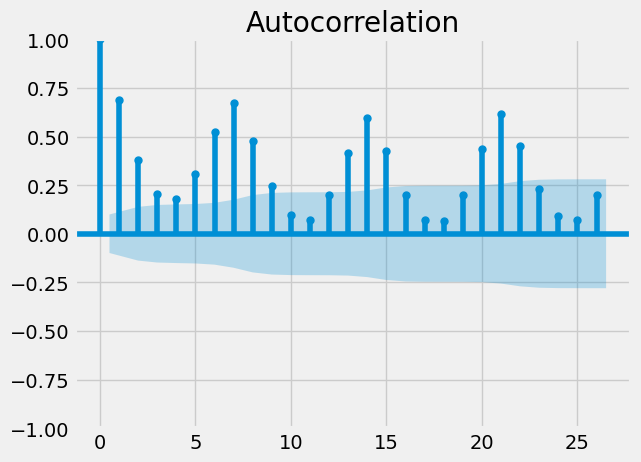

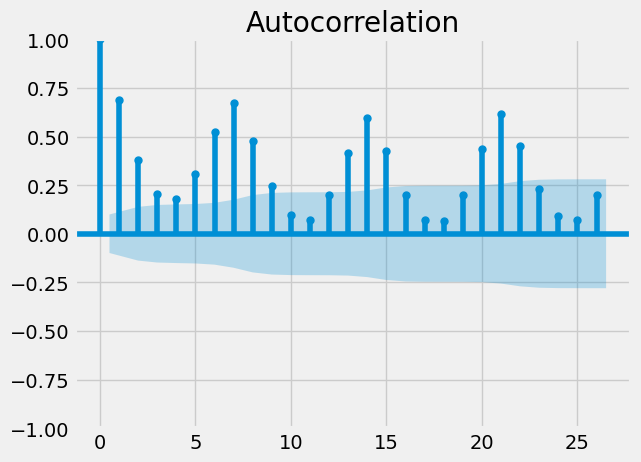

In [60]:
plot_acf(data["Views"])

### The Value of d is 1 as it is a seasonal data

### The value of p is 5

### The value of q is 2

# Training the SARIMA Model

In [63]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.468
Date:                            Sun, 08 Jan 2023   AIC                           6228.935
Time:                                    16:17:31   BIC                           6287.958
Sample:                                         0   HQIC                          6252.361
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7863      0.133      5.900      0.000       0.525       1.047
ar.L2         -0.7941      0.135   

# Forecasting from the Trained Data

### Predicting the next 100 days

In [67]:
predictions = model.predict(len(data), len(data)+100)


<AxesSubplot: >

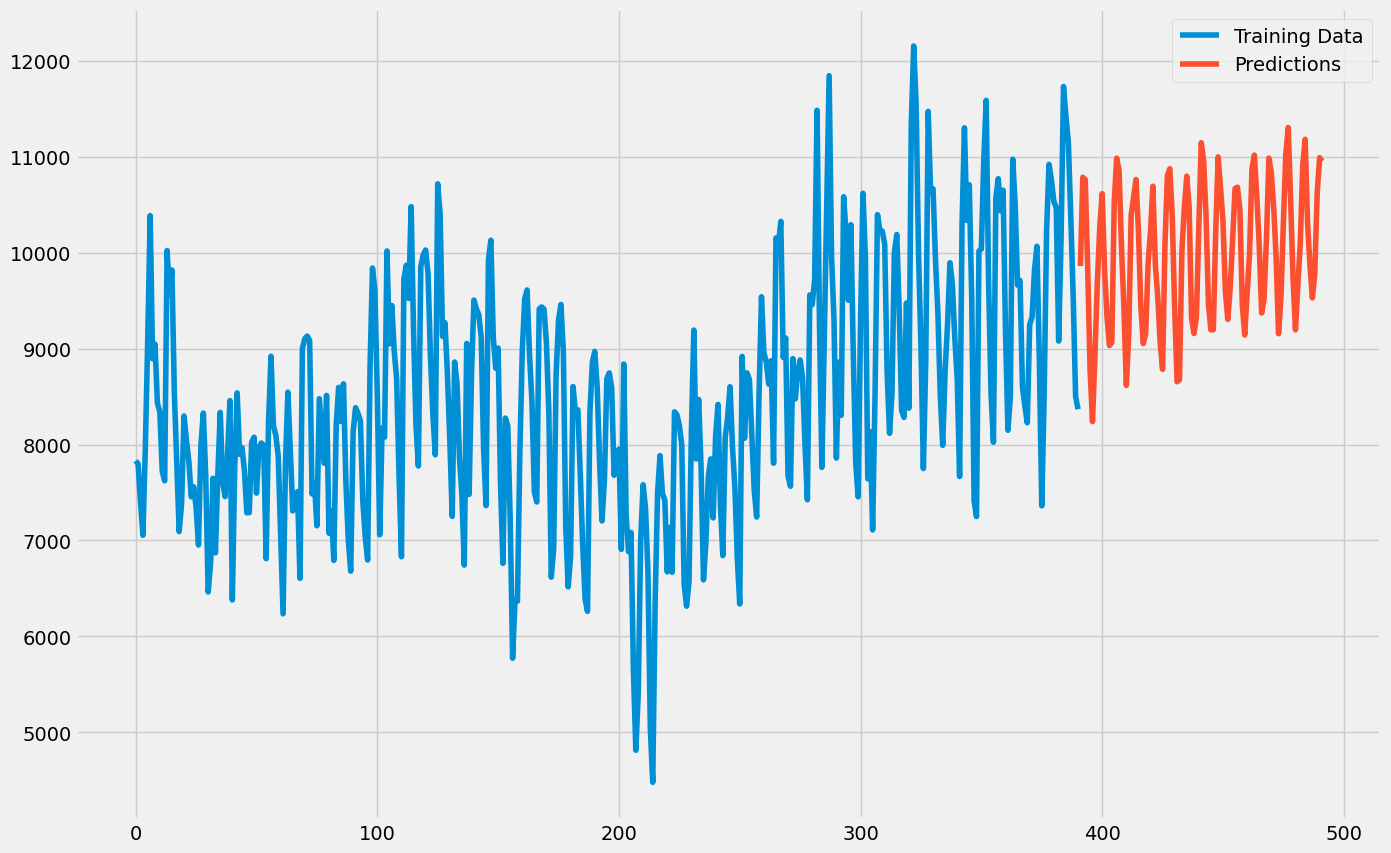

In [68]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

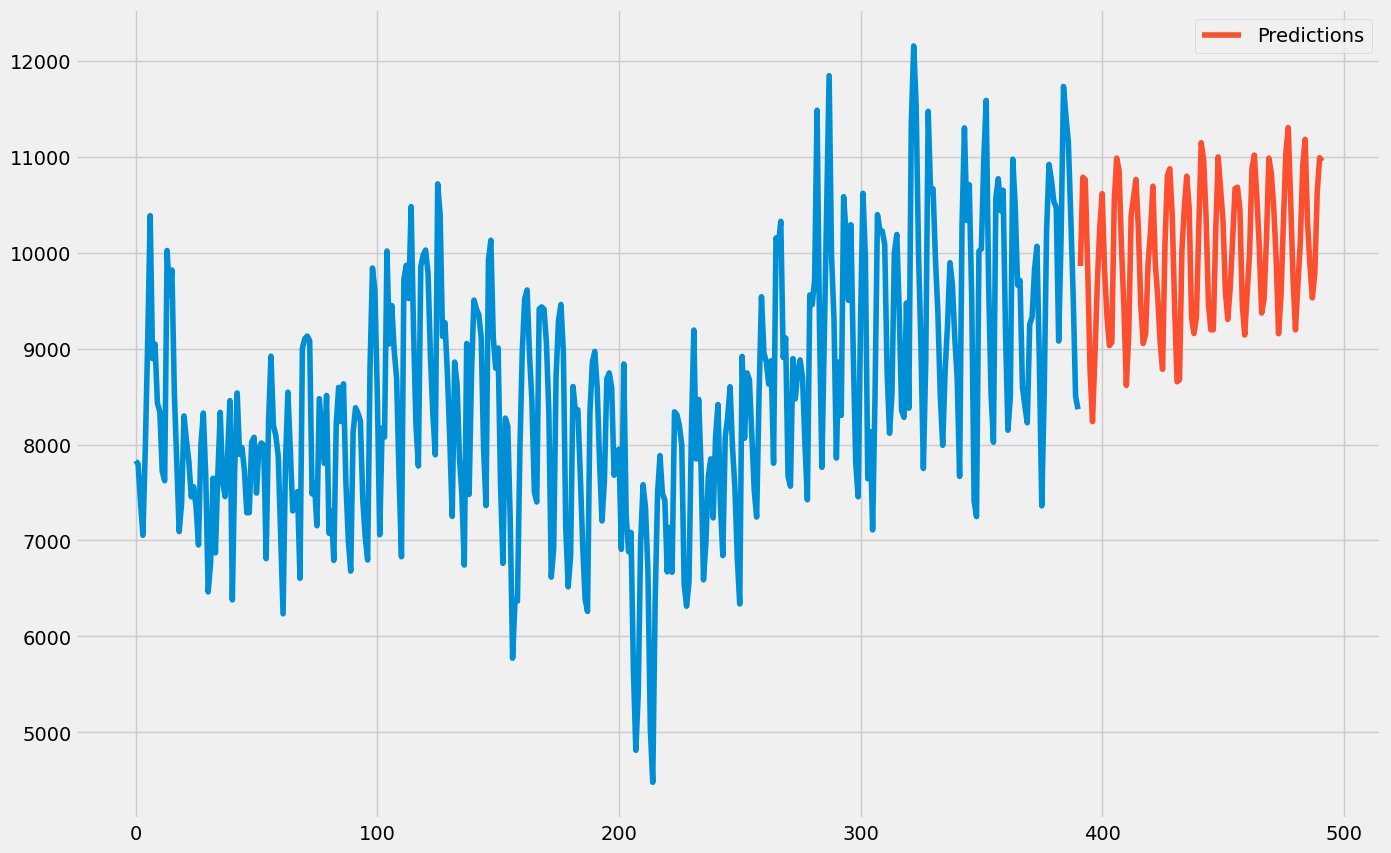

In [103]:
plt.figure(figsize=(15, 10))
fig=plt.plot(data['Views'])
predictions.plot(legend=True, label="Predictions")
plt.savefig('fig.png')


<Figure size 640x480 with 0 Axes>

In [89]:
pickle.dump(model,open('model.pkl','wb'))